# Linear Regression and Gradient Descent in Python
---

### Data

$$
\overbrace{
X = \begin{bmatrix}
1 & x_1^{(1)}\\
1 & x_1^{(2)}\\
\vdots\\
1 & x_1^{(100)}\end{bmatrix} \in \mathbb{R}^{(100, 2)}
}^{\large\text{Input}}
\qquad
\overbrace{
\theta = \begin{bmatrix}\theta_0 \\ \theta_1\end{bmatrix}
}^{\large\text{Weight}}
\qquad
\overbrace{
y = \begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
\vdots\\
y^{(100)}\\
\end{bmatrix} \in \mathbb{R}^{100}
}^{\large\text{Output}}
$$

**Notation**
- Upper script $1 \leq (i) \leq 100$ denotes the index of sample in our 100 sample space.
- Lower script $i \in \{0, 1\}$ denotes the $i$th element in the a row of input matrix $X$.
- Each corresponding row of $X$ and $y$ forms a relationship $y^{(i)} \approx \theta_0x_0^{(i)}+\theta_1x_1^{(i)}$, where 
    - $x_0^{(i)}=1$ for all $i$
    - $\theta_0$ can thus been seen as the bias term in the linear equation $y = mx + b$.

**Goal**
- Given these 100 $(x, y)$ pairs, we want to find the best fitting line to represent the relationship between $x$ and $y$.
- Learning algorithm to use: **Linear Regression**.
- Optimization algorithm to use: **Gradient Descent**.

### Hypothesis

$$
h_\theta = \theta_0x_0 + \theta_1x_1 
\implies 
\begin{cases}
h_\theta(x^{(1)}) &= \theta_0x_0 ^{(1)} + \theta_1x^{(1)} \\
h_\theta(x^{(2)}) &= \theta_0x_0^{(2)}  + \theta_1x^{(2)} \\
&\vdots \\
h_\theta(x^{(100)}) &= \theta_0x_0^{(100)}  + \theta_1x^{(100)}
\end{cases}
\implies
h_\theta = 
\begin{bmatrix}
1 & x_1^{(1)}\\
1 & x_1^{(2)}\\
\vdots\\
1 & x_1^{(100)}\end{bmatrix}
\begin{bmatrix}
\theta_0 \\ \theta_1
\end{bmatrix}
= X\theta
$$

*Vectorized*
$$
h_\theta = X\theta
$$

*Code:*

```Python
# Given X, y, theta
h = np.dot(X, theta)
```

### Cost Function

$$
J(\theta_0, \theta_1) = \frac{1}{2m}\sum_{i=1}^m(h_\theta(x_i) - y_i)^2
$$

- $m$: number of samples, in this case, 100.
- $h_\theta(x_i) - y_i$: error of one sample.
- $\sum_{i=1}^m(h_\theta(x_i) - y_i)^2$: sum of squared error.
- Divide the above value by $2m$ to get the **mean squared error** (2 in the denominator for cleaner math).

*Vectorized:*
$$
J(\theta) = \frac{1}{2m}(X\theta-y)^T(X\theta-y) = \frac{1}{2m}(h_\theta-y)^T(h_\theta-y)
$$

*Code:*
```python
# Given X, y, theta
h = np.dot(X, theta)
loss = h - y                # vector subtraction as h, y are both ndarrays
sse = np.sum(loss ** 2)     # sum of squared error
cost = sse / (2 * m)        # get mean squared error
```

### Partial Derivatives

$$
\begin{align*}
\nabla J = \begin{bmatrix}\frac{\partial J}{\partial\theta_0}\\\frac{\partial J}{\partial\theta_1}\end{bmatrix}\\
\frac{\partial}{\partial\theta_0}J(\theta_0, \theta_1) &= \frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})
\\
\frac{\partial}{\partial\theta_1}J(\theta_0, \theta_1) &= \frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)}) \, x^{(i)}
\end{align*}
$$

- The gradient vector $\nabla J$ tells you which direction you can move to *increase* the value of function most rapidly.

*Vectorized:*
$$
\begin{align*}
\nabla J(\theta) = \frac{1}{m}X^T(X\theta-y) = \frac{1}{m}X^T(h_\theta-y)
\end{align*}
$$

*Code:*
```python
# Given X, y, theta
h = np.dot(X, theta)
loss = h - y               
sse = np.sum(loss ** 2)    
cost = sse / (2 * m)   
grdient = np.dot(x.transpose(), loss) / m
```

### Gradient Descent

$$
\begin{align*}
\theta_0 &:= \theta_0 - \alpha \frac{1}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i)
\\
\theta_1 &:= \theta_1 - \alpha \frac{1}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i) \cdot x_i
\end{align*}
$$

- $\alpha$: **learning rate** - how much to descend by, or how fast  to converge.
- By above, to find a local minimum of a $J$ using **gradient descent**, one takes steps propotional to the *negative* of $J$ at the current point.

*Vectorized:*
$$
\theta = \theta - \frac{\alpha}{m}X^T(X\theta-y) = \theta - \frac{\alpha}{m}X^T(h_\theta-y) = \theta - \alpha \nabla J(\theta)
$$

*Code:*
```python
# Given X, y, theta
h = np.dot(X, theta)
loss = h - y               
sse = np.sum(loss ** 2)    
cost = sse / (2 * m)    
grdient = np.dot(x.transpose(), loss) / m   
theta = theta - alpha * gradient
# Repeat
```

---
### Batch Gradient Descent

**Code**

In [90]:
import numpy as np
import random

def gradientDescent(X, y, theta, alpha, n_iter, history):
    """Performs gradient descent to learn theta.
    Update the model based on all samples.
    
    Args:
        X (ndarray): input matrix
            - Each row represents a sample
            - Each column represents a feature
        y (ndarray): output matrix (vector)
            - Each row represents a target value
        theta (ndarray): weight vector
        alpha (float): learning rate
        n_iter (int): number of iterations
        history (dict): helper object for later visualization
        
    Returns:
        Optimized weight after `n_iter` iterations.
    """
    
    xTrans = x.transpose() # We need this later
    m = y.size # Number of samples
    for i in range(n_iter):
        h = np.dot(X, theta)
        loss = h - y
        sse = np.sum(loss ** 2)
        cost = sse / (2 * m)
        if (i % 10000 == 0): # Print current cost
            history[i] = cost
            print("Iteration: {} | Cost: {}".format(i, cost))
            
        gradient = np.dot(xTrans, loss) / m
        theta = theta - alpha * gradient
    return theta

**Demo**

In [74]:
def genData(numPoints, bias, variance):
    """Generate sample data for GD demo.
    
    Args:
        numPoints (int): number of data points, i.e., m.
        bias (float): the bias term in linear regression.
        variance (float): noise for our data points.
        
    Returns:
        X: ndarray with dim m*2, the input.
        y: ndarray with dim m, the output.
    """
    
    X = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    for i in range(numPoints):
        x[i][0] = 1 # arbitrary starting value
        x[i][1] = i # arbitrary starting value
        y[i] = (i + bias) + random.uniform(0, 1) * variance # randomly generated y values
    return x, y

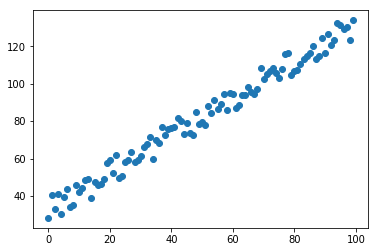

In [91]:
# Generate 100 data points, with a bias of 25, plus a certain degree of variance.
X, y = genData(100, 25, 15)
# Plot the points.
plt.scatter(range(100), y)

In [92]:
# Number of features. In this case, 2:
# - theta_0: the "intercept"
# - theta_1: the "slope"
n = np.shape(x)[1]

theta = np.ones(n) # Arbitrary starting point
n_iter = 100000 # Number of iterations
alpha = 0.0005 # Arbitrary learning rate
history = {} # Helper object to track cost

theta = gradientDescent(x, y, theta, alpha, n_iter, history)
print("Parameters after gradient descent:", theta)
print("Best fitting line: {}x + {}".format(theta[1], theta[0]))

Iteration: 0 | Cost: 501.97937160902654
Iteration: 10000 | Cost: 19.274007181689772
Iteration: 20000 | Cost: 9.57982599768295
Iteration: 30000 | Cost: 8.81319286398325
Iteration: 40000 | Cost: 8.752566148788764
Iteration: 50000 | Cost: 8.747771680047846
Iteration: 60000 | Cost: 8.747392524910811
Iteration: 70000 | Cost: 8.747362540646506
Iteration: 80000 | Cost: 8.747360169437423
Iteration: 90000 | Cost: 8.747359981917977
Parameters after gradient descent: [33.39634052  0.9799255 ]
Best fitting line: 0.9799254960456543x + 33.3963405182539


(0, 100)

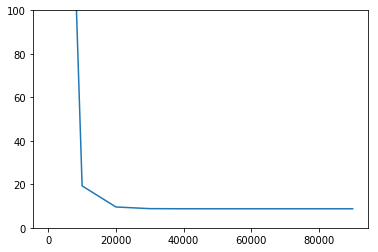

In [93]:
fig = plt.plot(history.keys(), history.values())
axes = plt.gca()
axes.set_ylim([0,100])

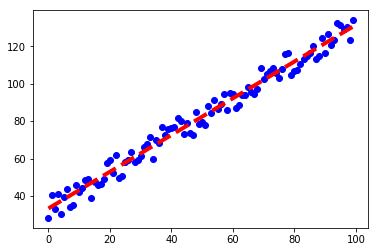

In [94]:
plt.scatter(range(100), y, color="blue")
plt.plot(x, theta[0]+theta[1]*x, color="red", linestyle='--', linewidth='4.0')

*Ayyy pretty accurate :)*